# Dimensionality reduction on mnist

**Dimensionality reduction performed on mnist dataset using PCA and visualization of 2D decompositions made by it and few other algorithms.**

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

np.random.seed(42)

In [2]:
dataDict = fetch_openml('mnist_784', version=1)

In [3]:
data = dataDict.data
target = dataDict.target.astype(np.uint8)

In [4]:
X_train = data[:60000]
X_test = data[60000:]
y_train = target[:60000]
y_test = target[60000:]

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
rnd_clf1 = RandomForestClassifier(random_state=42)

%time rnd_clf1.fit(X_train, y_train)

Wall time: 1min 21s


RandomForestClassifier(random_state=42)

In [7]:
accuracy_score(y_test, rnd_clf1.predict(X_test))

0.9705

So far so good, now let's use PCA and check the performance and training time.

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=0.95, random_state=420)
%time X_train_decomposed = pca.fit_transform(X_train)
X_test_decomposed = pca.transform(X_test)

Wall time: 11.9 s


In [10]:
rnd_clf2 = RandomForestClassifier(random_state=4200)

%time rnd_clf2.fit(X_train_decomposed, y_train)

Wall time: 3min 22s


RandomForestClassifier(random_state=4200)

In [11]:
accuracy_score(y_test, rnd_clf2.predict(X_test_decomposed))

0.9476

Surprisingly, the forest took much more time for training and it's performance dropped singnificantly.

Well, whatever.

In [12]:
pca.n_components_

154

**t-SNE and visualization**

In [13]:
# preventing extending too much computation time
data = data[:5000]
target = target[:5000]

In [14]:
colors = ('black','violet', 'pink', 'blue', 'cyan', 'green', 'yellow', 'orange', 'red', 'darkred')

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(random_state=42)

%time data_visual_tsne = tsne.fit_transform(data, target)

Wall time: 2min 18s


In [17]:
def plot_visualization(data_decomposed, target_classes, colors):
    X = data_decomposed[:, 0]
    Y = data_decomposed[:, 1]
    for i in range(10):
        idx = (target_classes == i)
        plt.scatter(X[idx], Y[idx], c=colors[i], marker='$'+str(i)+'$', label=i)
    plt.legend(loc='upper right')

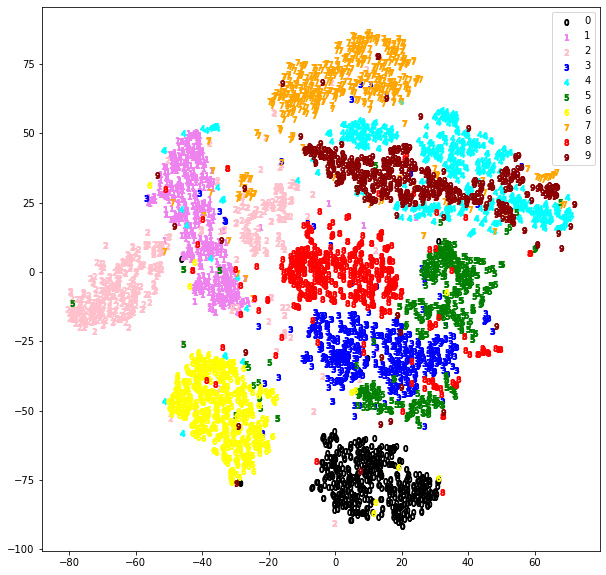

In [18]:
plt.figure(figsize=(10, 10))
plot_visualization(data_visual_tsne, target, colors)

Now let's try some other algorithms for data decomposition

PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(random_state=42)

%time data_visual_pca = pca.fit_transform(data, target)

Wall time: 1.8 s


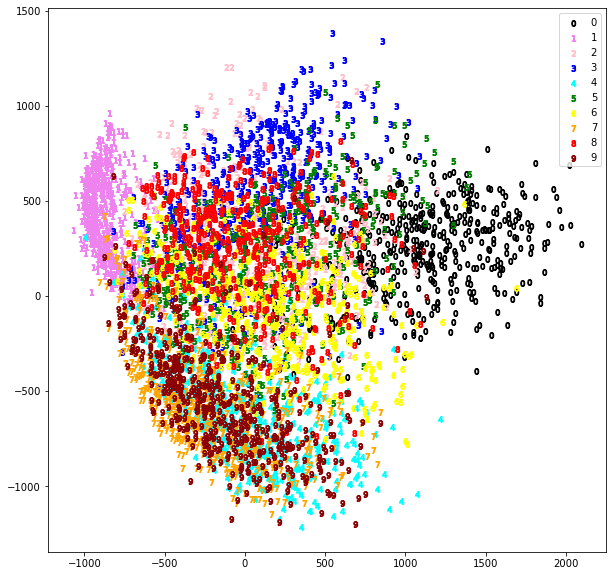

In [21]:
plt.figure(figsize=(10, 10))
plot_visualization(data_visual_pca, target, colors)

LLE

In [22]:
from sklearn.manifold import LocallyLinearEmbedding

In [23]:
lle = LocallyLinearEmbedding(random_state=42)

%time data_visual_lle = lle.fit_transform(data, target)

Wall time: 1min 23s


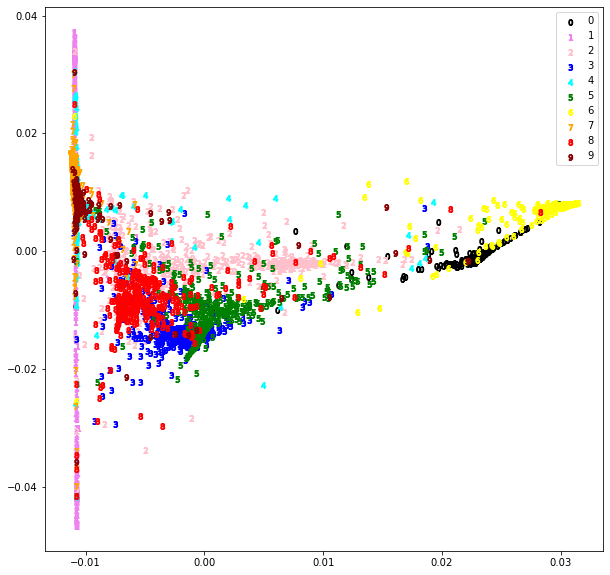

In [24]:
plt.figure(figsize=(10, 10))
plot_visualization(data_visual_lle, target, colors)

MDS

In [25]:
from sklearn.manifold import MDS

In [26]:
mds = MDS(random_state=42)

%time data_visual_mds = mds.fit_transform(data, target)

Wall time: 45min 53s


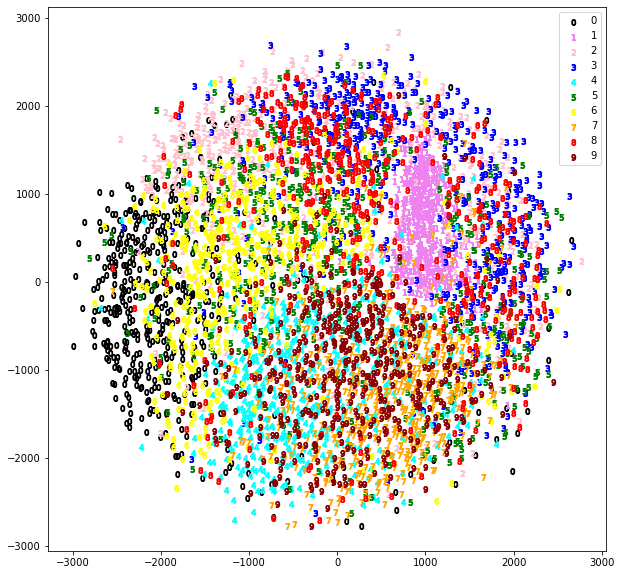

In [27]:
plt.figure(figsize=(10, 10))
plot_visualization(data_visual_mds, target, colors)

Above plots make it clear. t-SNE works well for preparing data for visualization and other algorithms produce hard to interpret set of features. Nonetheless, all of them can be useful in specific cases.